In [41]:
import os
import sys
from importlib import reload
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange
import pandas as pd

from icecream import ic, colorize as ic_colorize, argumentToString

sns.set_theme(rc={"legend.facecolor": "w"})
mpl.rcParams["pdf.fonttype"] = 42

os.environ["PYDEVD_DISABLE_FILE_VALIDATION"] = "1"

# Register a function to summarize numpy array
@argumentToString.register
def argumentToString_ndarray(obj: np.ndarray):
  return (
    f"ndarray, shape={obj.shape}, dtype={obj.dtype}, "
    f"min={obj.min()}, max={obj.max()}"
  )


ic.configureOutput(prefix="⚡ ")
ic.configureOutput(outputFunction=lambda s: print(ic_colorize(s)))

np.set_printoptions(threshold=5, precision=2, edgeitems=2, linewidth=200, suppress=True)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
from admice.dataload import session_from_mouse_from_matfile, load_mice_from_mat 

In [43]:
data_root = os.path.expanduser("~/data/tedho_ad_mice/")

def jdr(fname:str) -> str:
  return os.path.join(data_root, fname)

sess_ctrl = load_mice_from_mat(jdr("workspace_28-Jun-2024_control_mice_2p_data_for_dan.v7.mat"), "controlmice", "control")
sess_young = load_mice_from_mat(jdr("workspace_28-Jun-2024_young3xtg_mice_2p_data_for_dan.v7.mat"), "young3xtgmice", "young_3xtg")
sess_old = load_mice_from_mat(jdr("workspace_28-Jun-2024_old3xtg_mice_2p_data_for_dan.v7.mat"), "old3xtgmice", "old_3xtg")

In [44]:
from admice.eventlda import FilteringStrategy, NeuronSamplingStrategy

In [45]:
filt_strat = FilteringStrategy(mode="two_window_delta", 
  window_width_pre = 23, window_buffer_pre = 2, reduce_mode_pre = "max", 
  window_width_post = 23, window_buffer_post = 2, reduce_mode_post = "max")
samp_strat = NeuronSamplingStrategy(mode="random", n_neurons = 45)

⚡ pos_nr: ndarray, shape=(45, 65), dtype=float64, min=-7.340107887088305, max=5.207708288302086
⚡ neg_nr: ndarray, shape=(45, 65), dtype=float64, min=-4.440798069310798, max=8.970983921582249


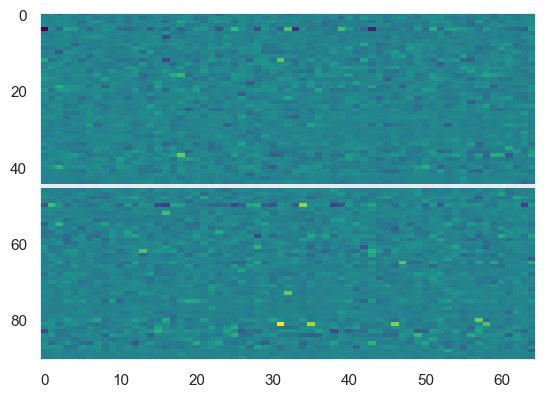

In [9]:
ksess = sess_ctrl[0]
pos_nr, neg_nr = filt_strat.extract_pos_neg_data_at_event(sess.data_nrt, event_ind=sess.tone_ind, seed=1)
n_idx = samp_strat.get_sample_inds(sess.n_neurons, seed=1)

pos_nr = pos_nr[n_idx, :]
neg_nr = neg_nr[n_idx, :]

ic(pos_nr)
ic(neg_nr)

plt.imshow(np.vstack((pos_nr, np.full((1, pos_nr.shape[1]), np.nan), neg_nr)), cmap='viridis')
plt.gca().set_aspect(0.5)
plt.grid(False)

2024-08-02 14:02:22,501	INFO worker.py:1788 -- Started a local Ray instance.


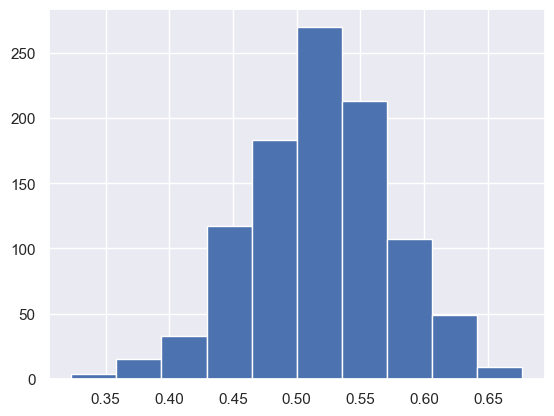

In [10]:
accuracy_c = pipeline_lda_event(sess, filt_strat, samp_strat, n_samples=1000)
plt.hist(accuracy_c);

In [146]:
res = multimouse_pipeline_lda_event(sess_ctrl, filt_strat, samp_strat, n_samples=10)
ic(res)

control 0 / 7: id 27
control 1 / 7: id 15
control 2 / 7: id 17
control 3 / 7: id 25
control 4 / 7: id 33
control 5 / 7: id 34
control 6 / 7: id 35
⚡ res: EventLDAResults(event='tone',
                       group='control',
                       mouse_ids=[27, 15, 17, 25, 33, 34, 35],
                       event_ind=[148, 147, 149, 147, 148, 148, 148],
                       accuracy_sc=array([[0.41, 0.44, ..., 0.66, 0.65],
              [0.5 , 0.54, ..., 0.62, 0.6 ],
              ...,
              [0.63, 0.52, ..., 0.58, 0.57],
              [0.52, 0.58, ..., 0.52, 0.52]]),
                       filt_strat=FilteringStrategy(mode='two_window_delta',
                                                    window_width=23,
                                                    window_buffer=2,
                                                    reduce_fn=<function max at 0x10847ff70>),
                       samp_strat=NeuronSamplingStrategy(mode='random',
                                 

EventLDAResults(event='tone', group='control', mouse_ids=[27, 15, 17, 25, 33, 34, 35], event_ind=[148, 147, 149, 147, 148, 148, 148], accuracy_sc=array([[0.41, 0.44, ..., 0.66, 0.65],
       [0.5 , 0.54, ..., 0.62, 0.6 ],
       ...,
       [0.63, 0.52, ..., 0.58, 0.57],
       [0.52, 0.58, ..., 0.52, 0.52]]), filt_strat=FilteringStrategy(mode='two_window_delta', window_width=23, window_buffer=2, reduce_fn=<function max at 0x10847ff70>), samp_strat=NeuronSamplingStrategy(mode='random', n_neurons=45, scores=None))

In [11]:
n_samples = 10
res_ctrl = multimouse_pipeline_lda_event(sess_ctrl, filt_strat, samp_strat, n_samples=n_samples) 
res_young = multimouse_pipeline_lda_event(sess_young, filt_strat, samp_strat, n_samples=n_samples) 
res_old = multimouse_pipeline_lda_event(sess_old, filt_strat, samp_strat, n_samples=n_samples) 

control 0 / 7: id 27
control 1 / 7: id 15
control 2 / 7: id 17
control 3 / 7: id 25
control 4 / 7: id 33
control 5 / 7: id 34
control 6 / 7: id 35
young_3xtg 0 / 7: id 16
young_3xtg 1 / 7: id 18
young_3xtg 2 / 7: id 19
young_3xtg 3 / 7: id 20
young_3xtg 4 / 7: id 22
young_3xtg 5 / 7: id 23
young_3xtg 6 / 7: id 24
old_3xtg 0 / 6: id 28
old_3xtg 1 / 6: id 29
old_3xtg 2 / 6: id 30
old_3xtg 3 / 6: id 31
old_3xtg 4 / 6: id 32
old_3xtg 5 / 6: id 52


In [14]:
df_ctrl = res_ctrl.to_df()
df_young = res_young.to_df()
df_old = res_old.to_df()
df_all = pd.concat([df_ctrl, df_young, df_old], ignore_index=True)

df_all["error"] = 1. - df_all["accuracy"]

df_all

,group,mouse_id,cell_sample_ind,accuracy,error
0,control,27,0,0.407692,0.592308
1,control,27,1,0.438462,0.561538
2,control,27,2,0.500000,0.500000
3,control,27,3,0.530769,0.469231
4,control,27,4,0.576923,0.423077
...,...,...,...,...,...
195,old_3xtg,52,5,0.576923,0.423077
196,old_3xtg,52,6,0.461538,0.538462
197,old_3xtg,52,7,0.538462,0.461538
198,old_3xtg,52,8,0.530769,0.469231


<Axes: xlabel='error', ylabel='Probability'>

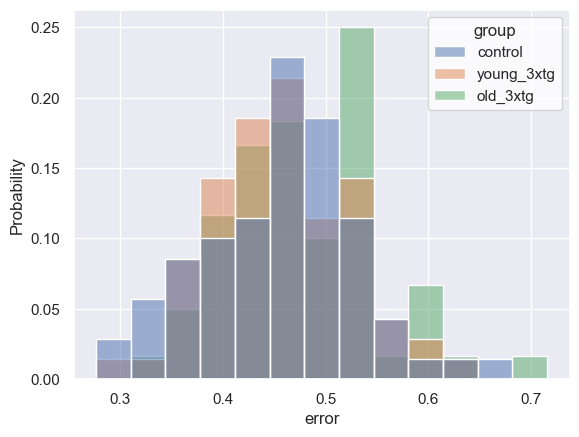

In [15]:
sns.histplot(data=df_all, x="error", hue="group", common_bins=True, common_norm=False, cumulative=False, stat="probability")

<Axes: xlabel='error', ylabel='Density'>

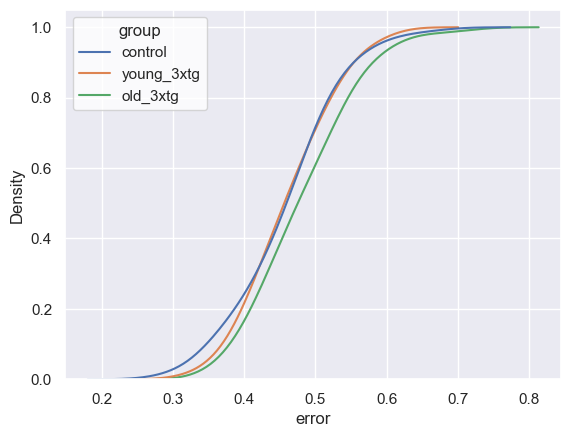

In [195]:
sns.kdeplot(data=df_all, x="error", hue="group", common_norm=False, cumulative=True)

(0.5, 0.56)

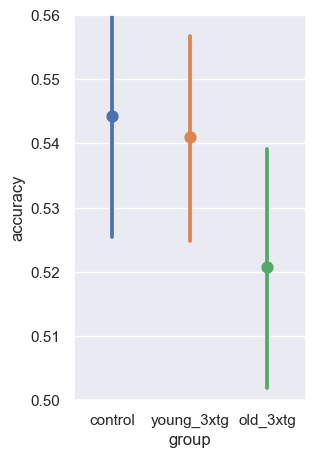

In [16]:
plt.figure(figsize=(3, 5))
sns.pointplot(data=df_all, y="accuracy", x="group", hue="group", errorbar="ci")
plt.ylim([0.5, 0.56])

(0.5, 0.56)

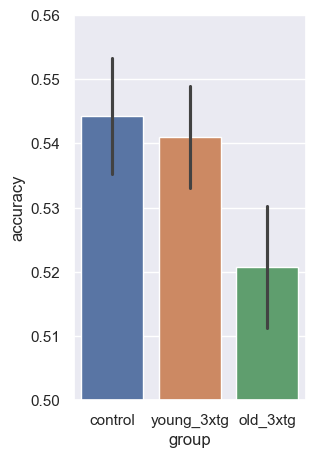

In [17]:
plt.figure(figsize=(3, 5))
sns.barplot(data=df_all, y="accuracy", x="group", hue="group", errorbar="se")
plt.ylim([0.5, 0.56])

Try again at 400 ms post tone with shorter 400 ms window, to double check


In [18]:
400 / 30

13.333333333333334

In [19]:
filt_strat_short = FilteringStrategy(mode="two_window_delta", 
  window_width_pre = 23, window_buffer_pre = 2, reduce_mode_pre = "max", 
  window_width_post = 13, window_buffer_post = 2, reduce_mode_post = "max")

In [33]:
n_samples = 10
post_tone_inds_fn = lambda mice: [mouse.tone_ind + 400//mouse.fps for mouse in mice]

res_ctrl = multimouse_pipeline_lda_event(sess_ctrl, filt_strat_short, samp_strat, n_samples=n_samples, event_inds=post_tone_inds_fn(sess_ctrl)) 
res_young = multimouse_pipeline_lda_tone(sess_young, filt_strat_short, samp_strat, n_samples=n_samples, event_inds=post_tone_inds_fn(sess_young)) 
res_old = multimouse_pipeline_lda_event(sess_old, filt_strat_short, samp_strat, n_samples=n_samples, event_inds=post_tone_inds_fn(sess_old)) 

control 0 / 7: id 27
control 1 / 7: id 15
control 2 / 7: id 17
control 3 / 7: id 25
control 4 / 7: id 33
control 5 / 7: id 34
control 6 / 7: id 35
young_3xtg 0 / 7: id 16
young_3xtg 1 / 7: id 18
young_3xtg 2 / 7: id 19
young_3xtg 3 / 7: id 20
young_3xtg 4 / 7: id 22
young_3xtg 5 / 7: id 23
young_3xtg 6 / 7: id 24
old_3xtg 0 / 6: id 28
old_3xtg 1 / 6: id 29
old_3xtg 2 / 6: id 30
old_3xtg 3 / 6: id 31
old_3xtg 4 / 6: id 32
old_3xtg 5 / 6: id 52


In [34]:
df_ctrl = res_ctrl.to_df()
df_young = res_young.to_df()
df_old = res_old.to_df()
df_all = pd.concat([df_ctrl, df_young, df_old], ignore_index=True)

df_all["error"] = 1. - df_all["accuracy"]

df_all

,group,mouse_id,cell_sample_ind,accuracy,error
0,control,27,0,0.523077,0.476923
1,control,27,1,0.538462,0.461538
2,control,27,2,0.492308,0.507692
3,control,27,3,0.407692,0.592308
4,control,27,4,0.469231,0.530769
...,...,...,...,...,...
195,old_3xtg,52,5,0.546154,0.453846
196,old_3xtg,52,6,0.469231,0.530769
197,old_3xtg,52,7,0.484615,0.515385
198,old_3xtg,52,8,0.453846,0.546154


(0.5, 0.56)

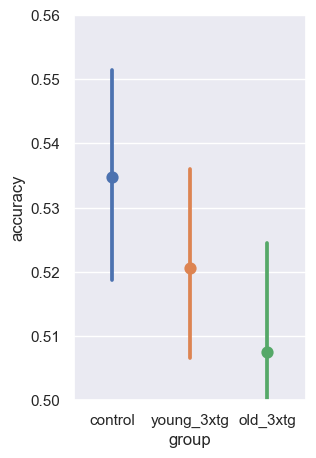

In [35]:
plt.figure(figsize=(3, 5))
sns.pointplot(data=df_all, y="accuracy", x="group", hue="group", errorbar="ci")
plt.ylim([0.5, 0.56])

In [40]:
res_old.accuracy_sc[0, 0]

np.float64(0.5307692307692308)

# disposed


In [147]:
res.accuracy_sc.shape

(7, 10)

In [79]:
rng = np.random.default_rng(seed=1) 

n_reps = 10
n_neurons_sampled = 45

pos_nr, neg_nr = pick_pos_neg_two_window_delta_around_ind(sess.data_nrt, 
    event_ind=sess.tone_ind, window_buffer=window_buffer, window_width=window_width, reduce_fn=np.max)

acc_s = np.zeros((n_reps,))
for s in trange(n_reps, desc="Sampling neurons"):
  n_idx = rng.choice(sess.n_neurons, n_neurons_sampled) 
  acc_s[s] = lda_accuracy(pos_nr[n_idx, :], neg_nr[n_idx, :])


Sampling neurons: 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]


In [105]:
M = 3
C = 2
m, c = np.ogrid[:M, :C]

m_ = m + 0*c
c_ = c + 0*m

with np.printoptions(threshold=np.inf):
  print(m_)
  print("m_", m_.flatten())
  print(": ", np.repeat(m, C))
  print("c_", c_.flatten())
  print(": ", np.tile(np.arange(C), M))

[[0 0]
 [1 1]
 [2 2]]
m_ [0 0 1 1 2 2]
:  [0 0 1 1 2 2]
c_ [0 1 0 1 0 1]
:  [0 1 0 1 0 1]


In [80]:
import pandas as pd
def res_to_df(res) -> pd.DataFrame:
  S, T = res.accuracy_st.shape
  total_time = float(T-1) / 30. 
  time_sec = np.linspace(0, total_time, T)
  time_rel_event = time_sec 
  time_rel_event = time_rel_event - time_rel_event[res.event_ind]

  data = {
    'group': np.repeat(res.group, S*T),
    'mouse_id': np.repeat(res.mouse_ids, T),
    'time_rel_tone': np.tile(time_rel_event, S),
    'accuracy': res.accuracy_st.flatten()
  }
  df = pd.DataFrame(data)
  return df

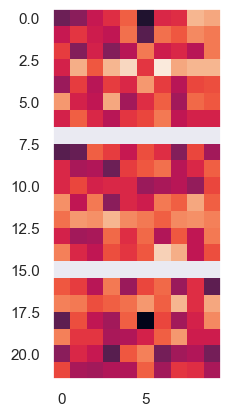

In [176]:
gap = np.full((1, res_ctrl.n_samples), np.nan)
plt.imshow(np.vstack((res_ctrl.accuracy_sc, gap, res_young.accuracy_sc, gap, res_old.accuracy_sc)))
plt.gca().set_aspect(1)
plt.grid(False)

In [81]:
df_ctrl = res_to_df(res_ctrl)
df_young = res_to_df(res_young)
df_old = res_to_df(res_old)

In [190]:
df_all = pd.concat([df_ctrl, df_young, df_old], ignore_index=True)
df_all["error"] = 1. - df_all["accuracy"]
df_all

,group,mouse_id,cell_sample_ind,accuracy,error
0,control,27,0,0.407692,0.592308
1,control,27,1,0.438462,0.561538
2,control,27,2,0.500000,0.500000
3,control,27,3,0.530769,0.469231
4,control,27,4,0.576923,0.423077
...,...,...,...,...,...
195,old_3xtg,52,5,0.576923,0.423077
196,old_3xtg,52,6,0.461538,0.538462
197,old_3xtg,52,7,0.538462,0.461538
198,old_3xtg,52,8,0.530769,0.469231
